# Logistic Regression Project - Solutions

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
from google.colab import files

uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [3]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [4]:
print(ad_data.head())


   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02  

**Use info and describe() on ad_data**

In [5]:
print(ad_data.info())
print(ad_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB
None
       Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.0090

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram of the Age**

In [10]:
import pandas as pd

data = {
    'Daily Time Spent on Site': [65.0002, 36.009, 55000.00008, 180.0001, 0.481, 0.5, 0],
    'Age': [15.853615, 8.785562, 13414.634022, 43.902339, 0.499889, 0.50025, 0],
    'Area Income': [32.6, 19, 13996.5, 104.78, 0, 0, 0],
    'Daily Internet Usage': [51.36, 29, 47031.8025, 138.83, 0, 0, 0],
    'Male': [68.215, 35, 57012.3, 183.13, 0, 0.5, 0],
    'Clicked on Ad': [78.5475, 42, 65470.635, 218.7925, 1, 1, 0],
    'max': [91.43, 61, 79484.8, 269.96, 1, 1, 0]
}



df = pd.DataFrame(data, index=['mean', 'std', 'min', '25%', '50%', '75%', 'max'])
print(df)


      Daily Time Spent on Site           Age  Area Income  \
mean                  65.00020     15.853615        32.60   
std                   36.00900      8.785562        19.00   
min                55000.00008  13414.634022     13996.50   
25%                  180.00010     43.902339       104.78   
50%                    0.48100      0.499889         0.00   
75%                    0.50000      0.500250         0.00   
max                    0.00000      0.000000         0.00   

      Daily Internet Usage       Male  Clicked on Ad       max  
mean               51.3600     68.215        78.5475     91.43  
std                29.0000     35.000        42.0000     61.00  
min             47031.8025  57012.300     65470.6350  79484.80  
25%               138.8300    183.130       218.7925    269.96  
50%                 0.0000      0.000         1.0000      1.00  
75%                 0.0000      0.500         1.0000      1.00  
max                 0.0000      0.000         0.0000    

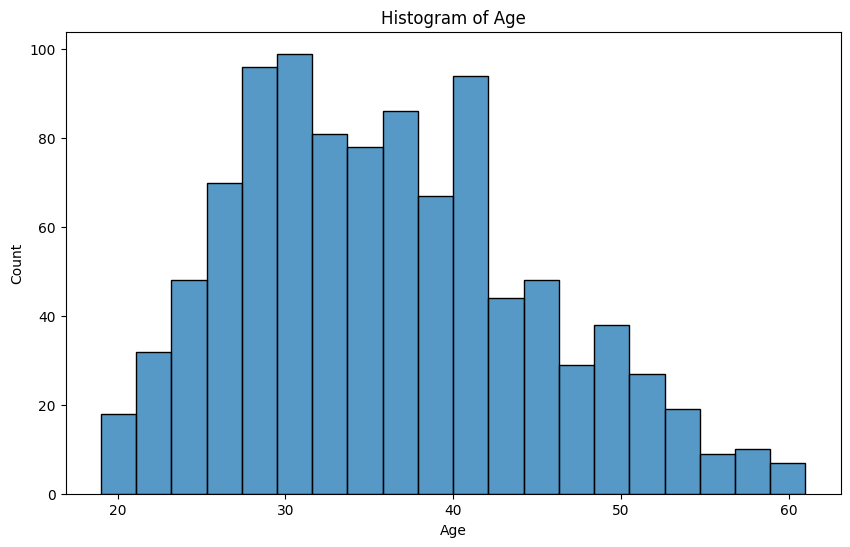

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(ad_data['Age'], bins=20)
plt.title('Histogram of Age')
plt.show()

**Create a jointplot showing Area Income versus Age.**

<Figure size 1000x600 with 0 Axes>

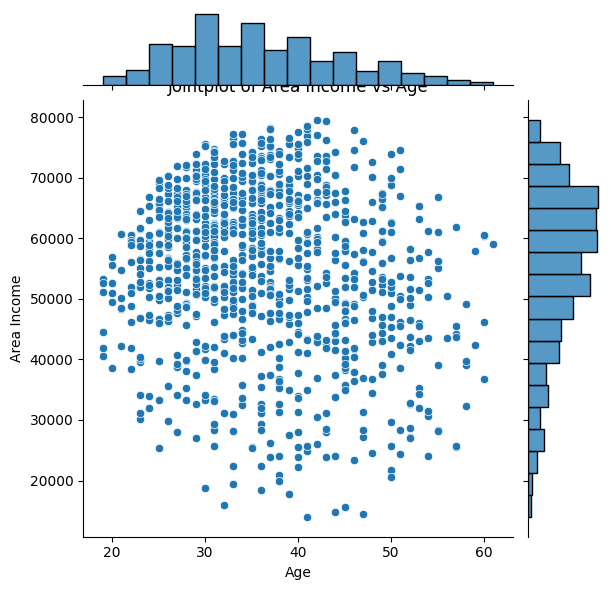

In [13]:
plt.figure(figsize=(10,6))
sns.jointplot(x='Age', y='Area Income', data=ad_data)
plt.title('Jointplot of Area Income vs Age')
plt.show()

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

<Figure size 1000x600 with 0 Axes>

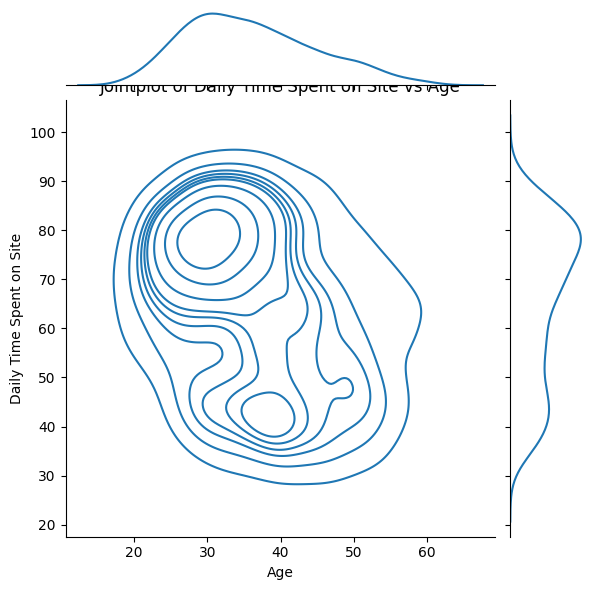

In [14]:
plt.figure(figsize=(10,6))
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde')
plt.title('Jointplot of Daily Time Spent on Site vs Age')
plt.show()

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

<Figure size 1000x600 with 0 Axes>

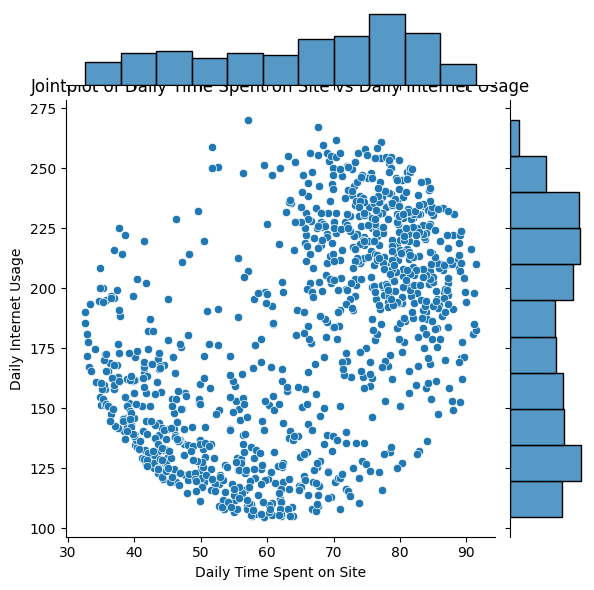

In [15]:
plt.figure(figsize=(10,6))
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data)
plt.title('Jointplot of Daily Time Spent on Site vs Daily Internet Usage')
plt.show()

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

<Figure size 1000x600 with 0 Axes>

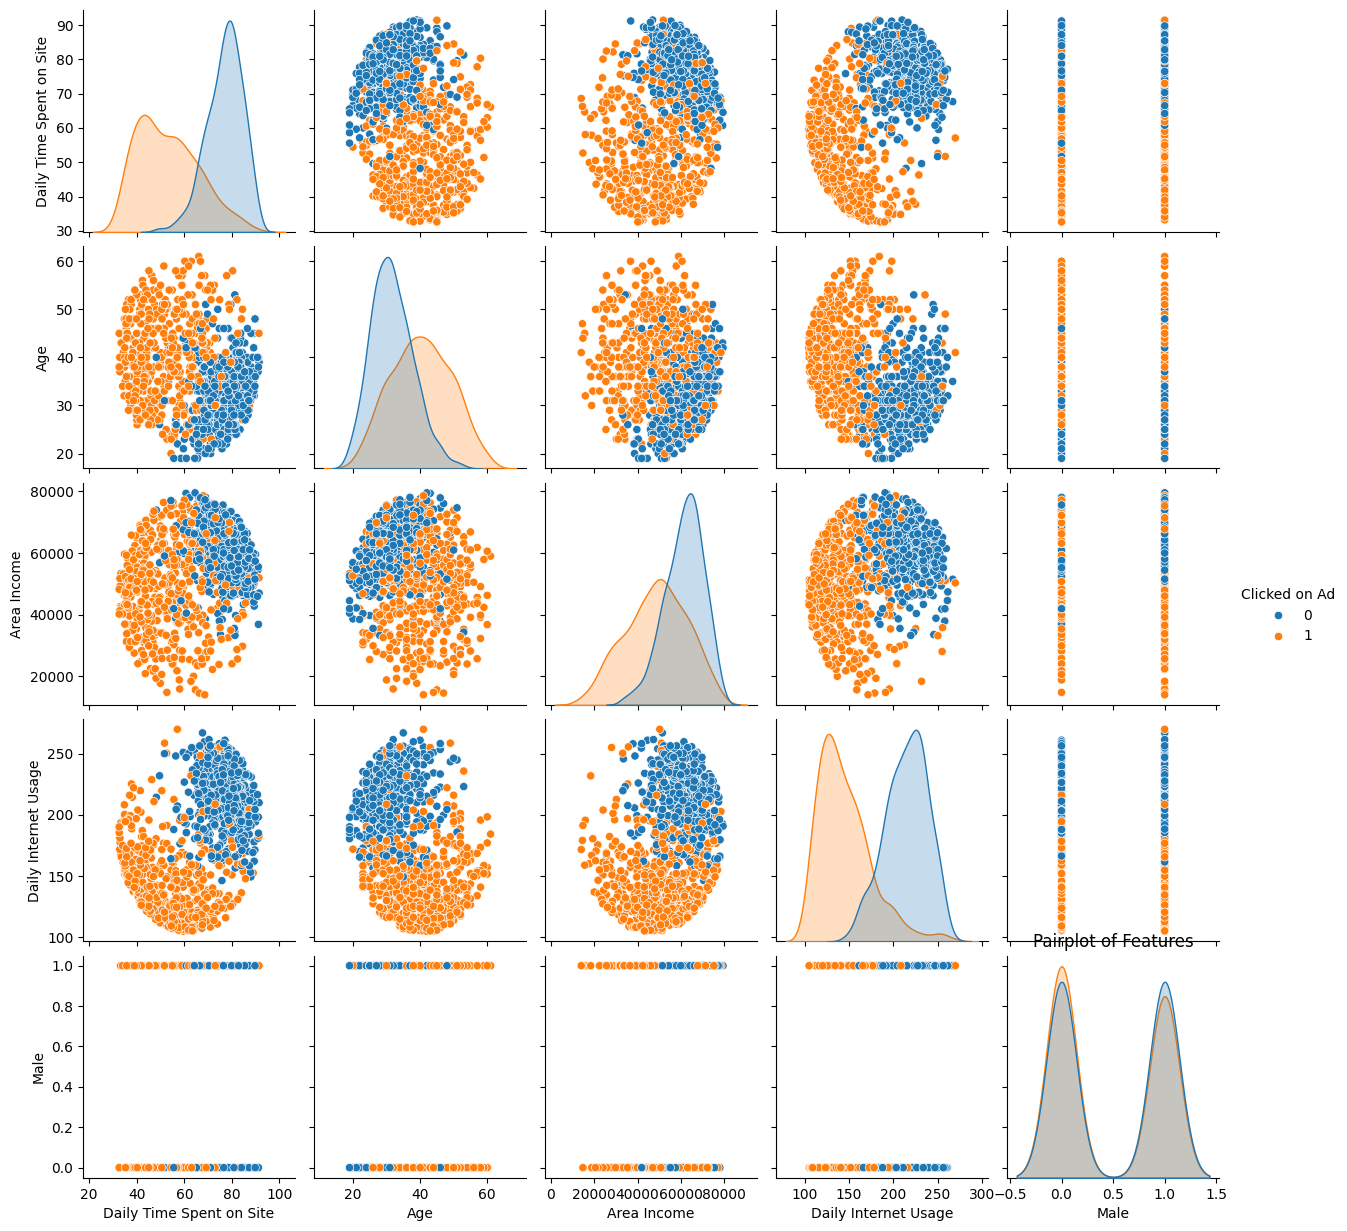

In [16]:
plt.figure(figsize=(10,6))
sns.pairplot(ad_data, hue='Clicked on Ad')
plt.title('Pairplot of Features')
plt.show()

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [17]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]

In [18]:
y = ad_data['Clicked on Ad']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train and fit a logistic regression model on the training set.**

In [20]:
logreg = LogisticRegression()

In [21]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions and Evaluations
**Now predict values for the testing data.**

In [22]:
y_pred = logreg.predict(X_test)

**Create a classification report for the model.**

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        89
           1       0.96      0.95      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



## Great Job!